## Content

- **Usecase Introduction: Spam Classification**

- **Mathematical Intuition behind naive bayes.**

- **Naive Assumption**

- **Laplace smoothing**

- **Bias Variance tradeoff**

- **Multinomial Naive Bayes**

- **Code walkthrough**




## Usecase Introduction - Spam classification

###  **Imagine you are Data Scientist at Google**

You are working on **Spam Classification model**

#### (Interaction) Question: What do you think will be good for classifying spam from not spam mails?

We can say that that email content will be one of the useful things in classfying the email.



#### Q. Which one one of the following do you think is a spam?

1. Mail 1 : "I, Nigerian prince need your help. Send money"
2. Mail 2: "Meeting scheduled for 5 pm. Kindly revert"


Obviously, Mail 1 is a spam mail.

<br>

#### Q. How did you come to conclusion that Mail 1 is Spam mail ?

Notice that there are few keywords which are specific to Spam mail only.

- For example:
"Nigerian prince", "lottery", "million dollars" all points to that mail is more likely to be spam.

<br>


#### Q. What if we had basic approach that classifies spam from ham based on all these **keywords**?


Let's look at a technique which works on the same principles i.e. Naive Bayes.










#### Understanding our spam classifier data

#### Q. What do we have in our data?

For our data, we have  
1. n number of texts which contains words
2. class label i.e.
    - Spam will be (class 1 or y = 1)
    - Ham (or Not spam) will be (class 0 or y = 0)




###  What do we understand by text?

The text body of email is essentially a **sequence of words**.

We can write $text_i$, as $ text_{i} = w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i $


where, d -> length of text $email_i$.

**Note:** The number of words in text1 **may or may not be equal** to the number of words in text2

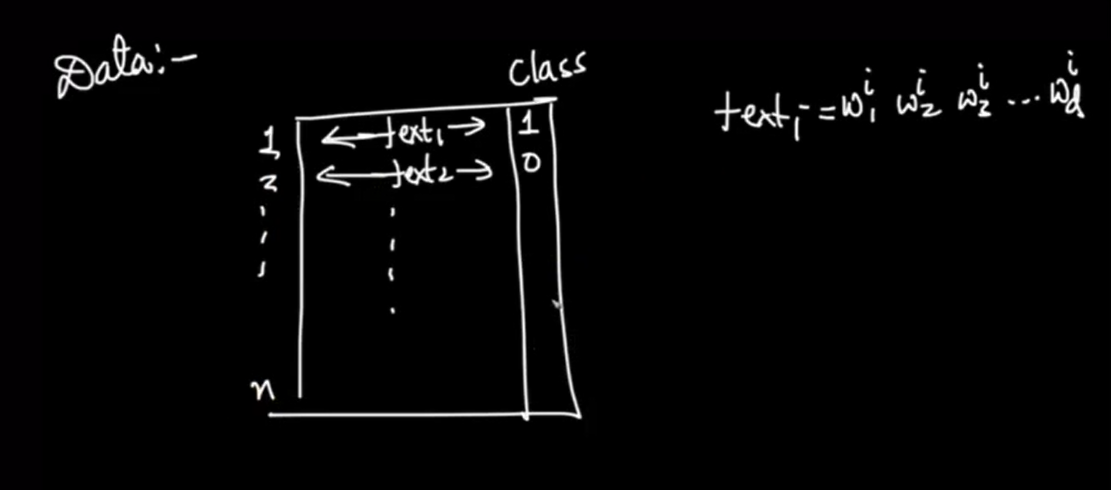

Let's look at our data now

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading data

In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 84.9MB/s]


#### Q. How do we make sure that the system knows our data is in English?
- We can set the value of parameter **encoding** as `latin-1` to  explicitly mention that the letters in the texts are english.

In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Performing EDA

Let's see the distribution of class labels


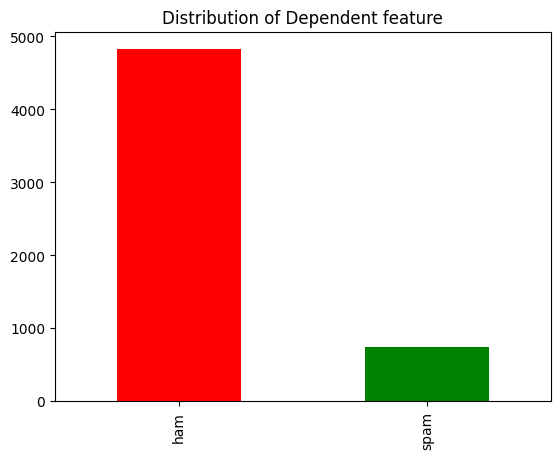

In [ ]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

**Observation**:

As we can see, the number of texts which are spam are quite less as compared to the texts which are ham (or not spam)

Clearly, we have an **imbalanced data**!


### Preprocessing data

Pre Read: https://colab.research.google.com/drive/1oPHVNZpJhqrIYC5-TNj9YSYfTlKp9UsW?usp=sharing

<center><img src='https://drive.google.com/uc?id=1df7QaDeJHv1arzqk87qkXcr5UrYP-6_P' width='800'></center>




<center><img src='https://drive.google.com/uc?id=1DrJ3CyaXMO4MV2xVcRoEuir6cHXwO23E' width='800'></center>




In [ ]:
!gdown 1zWrHUHliznqPg7Olyq41gmbbtHPWiEDn

Downloading...
From: https://drive.google.com/uc?id=1zWrHUHliznqPg7Olyq41gmbbtHPWiEDn
To: /content/processed_spam_data.pkl
100% 751k/751k [00:00<00:00, 71.8MB/s]


In [ ]:
df = pd.read_pickle('processed_spam_data.pkl')

In [ ]:
df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


**ASSESSMENTS COVERED**
- https://www.scaler.com/hire/test/problem/25983/



### Do some words tend to occur more frequently in ham texts than in spam texts?
Yes. Recall we talked about some keywords being specific to spam or ham messages.

Words like "Nigerian prince", "lottery", "prize", etc tend to occur more in spam messages than in ham.



<br>

#### How can we look at the Word frequencies (number of times each word occurs) in a given text?



**Todo for learner:** Try to find the word frequencies and check whether specific words occur for span/ham messages.

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

Performing the `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


## Mathematical Intuition

#### What is our goal ?

Our goal is:

- given a text/ email input, we want ot predict whether the it is a span or not.



<center><img src='https://drive.google.com/uc?id=1IodmXec-rnsfD5BEmso9dRze5uQ2YPbk' width='800'></center>




#### Q. How do we go about predicting whether a given $text_i$, is spam (y=1) or not (y=0)?

In order to do so, we calculate two probability values
1. Probabilty that given text is spam $ P(y=1|text)$
2. Probabilty that given text is ham $P(y=0|text) $

Out of the two Probabilities, Whichever value we find to be **higher**, we get our answer accordingly.



<center><img src='https://drive.google.com/uc?id=1mZc6QUfn4eiKx-R7JbMisghkaVTqv8zd' width='800'></center>




### How can we find the value of $P_{i}(y=1|text_i)$ , $P_{i}(y=0 | text_i)$?

Since this is **conditional probability**, perhaps we can apply **Baye's theorm**

Let's recall the concept using a simple example



<center><img src='https://drive.google.com/uc?id=1Wk33eDVHtX7YFk7J5SgqJAqT_U_VbFu0' width='800'></center>



</br>

Assume:

- Event A : India won

- Event B : Virat scored a century



#### What will be the P(A) and P(B) ?

$$P(A) = 60/100$$

$$P(B) = 12/100$$



#### What will be the value of P(A | B)?

P(A | B) means
- P(India Win | Virat scored Century)
i.e. Prob of India win given virat scored century


Recall that,

> $P(A|B) = \frac{P(A \cap B)}{P(B)}$


Therefore, $P(A|B)$ = 10/12




Using this,



$$P(A \cap B) = P(A|B) * P(B)$$

P(A \cap B)= 10/12 * 12/100 </br>
= 10/100

Similarly, we can find value of:

$P(B|A) * P(A)$ </br>
= 10/60 * 60/100 </br>
=10/100


It means, </br>
$$P(A|B) * P(B) = P(B|A) * P(A)$$




Concluding:

 $$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}  \text{<- Bayes thrm}$$

Using the bayes theorem, we can find the probability of datapoint beloning to spam / not spam class

Let's see how we do it.

### Applying bayes theorem



<center><img src='https://drive.google.com/uc?id=1TogkI60TS3qUpP56krB0tPmnIrRsvcVO' width='800'></center>




We need to compare the value of $P_{i}(y=1|text_i)$ and $P_{i}(y=0|text_i)$
- to classify it as spam (class 1)/ ham (class 0)

So, let's calculate $P_{i}(y=0|text_i)$ as well



<center><img src='https://drive.google.com/uc?id=1cJwyMJnvnFwr2406JxtZcuPwejo_2gY0' width='800'></center>


Notice that
- both terms have same denomination ($P(text_i)$)

Since we want to compare the values of $P_{i}(y=1|text_i)$ and $P_{i}(y=0|text_i)$
- we can simply ignore the denominatior

### How can we get the values of P(y=1) and P(y=0)?





<center><img src='https://drive.google.com/uc?id=1-abq_Mu06yqM5w_cfvhINOkbId0KetHi' width='800'></center>



In our training data, our dependent variable $y_i$ has two values 1 (spam) and 0 (ham)

- Hence, in order to calculate $P(y=1)$,
 - we **find the number of train points where occcurence of y=1**
 - and divide it by the **total number of train points**


Similarily, we can calculate $P(y=0)$
- by dividing **the number of train points where occcurence of y=0**
- to the **total number of train points** to get the probability for y=0.

<br>

**Note:** These $P(y=0)$ and $P(y=1)$ are called as the **class priors**.




<center><img src='https://drive.google.com/uc?id=1nqVpFbnqwQiRM5NWUQDesfaN-COBcjTT' width='800'></center>



## Naive Assumption



####  How do we calculate 𝑃(text|𝑦=1) and 𝑃(text|𝑦=0)?







<center><img src='https://drive.google.com/uc?id=15iuhrOFBpaqXq44TlPcNQeMw7OpfDePX' width='700'></center>




Lets first understand for $𝑃(𝑋|𝑦=1)$


<center><img src='https://drive.google.com/uc?id=1KKRpupBNcjnp8h5URrBKlO92ZVNLkOkN' width='800'></center>





It means that
- "given that the email is spam (y=1)
- then what is the probability that the email contains the words $w_{1}^i$ **and** $w_{2}^i$ **and** $w_{3}^i$ **and** ... **and** $w_{d}^i$






<br>

#### What problems can it cause for computing the probability of a text being spam ($P(X|y=1)$)?

From the entire training dataset, first, we have to select the y = 1 samples
- Then, we had to choose only those samples which have **all of the d words**
- This number of occurence of all the words in text can be **small**
- Hence causing selection of only a handful of samples in the data.

Hence P(X|y=1) would be a **very small value** which can have **no signficant purpose**.

Not to mention, this will be **computationally expensive**!

### What can we do to make P(X|y=1) a more sensible value?

Lets make a very simplified (naive) assumption that "the events of occurence of words $w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i$ is **independant** of each other, but **conditioned on the class** (i.e. whether y=1 or y=0)".

Lets take an example to understand this
 - Suppose we have only two words "Nigerian" and "prince" when y = 1
 - Then, as per the naive assumption, we can say P("Nigerian prince" | y=1) = P("Nigerian"|y=1). P("prince"|y=1)

<br>



#### Why is this assumption naive?
The Assumption is naive since, it may not always be true, but its a reasonable assumption to make.

The words are not independent of each other every time.

For example, Nigerian and Prince are not actually independent of each other, they generally exist together.

<br>

**Note:** From interview standpoint, a mistake that people make is that, they forget that in our naive assumption, this independance of occurence of words, is **"conditioned on the class"**. It is not the marginial probability that is independant, rather it is the **conditional probability** that is independant.




<center><img src='https://drive.google.com/uc?id=1wQ7dFoFrl1ZsneUz_tn7W5IrHq-1VOl5' width='800'></center>




### How to calculate $P(w_{1}|y=1)$ ?
Since $P(w_{1}|y=1)$ means the probability of having the word $w_1$ in our text, given that the text is spam (y=1)

- We go through all the texts that are spam (where y=1). Let the total number of texts that are spam in the dataset be n<sub>1</sub>  
- Find the number of texts where the word **w<sub>1</sub> exists**. Let the number of texts where we find this word be $n_{1}'$

So, $P(w_{1}|y=1)$ becomes $P(w_{1}|y=1) = \frac{n_{1}'}{n_{1}} $

\

**Note**: This technique where we find number of texts where word **exists** is called **Bernouli Naive bayes**



<center><img src='https://drive.google.com/uc?id=1StyRapQ3To-GtJZh8MSkGlf7HZvxZCK5' width='800'></center>





#### Summarize

By simply comparing $P(y=1|text)$ and $P(y=0|text)$, and which ever one is higher becomes our final prediction

**Note:**
- The terms $P(y=1)$ and $P(y=0)$ are called **class priors**.

 - It is simply the probability that a data point belongs to class 0 or 1.

- While The terms $P(w_{i}|y=1)$ and $P(w_{i}|y=0)$ are called **likelihoods**.
 - Likelihood is the probability of occurence of each word, conditioned on the class.

Hence, we can write:
$$ \text{P(y=1|text) = (class prior)*(likelihoods)}$$

<br>

We used a Naive assumption along with Baye's theorm
- hence we get the name Naive Bayes for this algorithm!


## Laplace Smoothing


Now suppose in our test data, we have a query text x_q which contains words {w1,w2,w6,w7,w'}

#### If w' is a word which does not belong to the set of all unique words in the training dataset , will Naive Bayes be able to predict the y_q correctly ?
No. Naive Bayes fails to predict.

Lets see why, using the same query $text_q$ ($x_q$)



<center><img src='https://drive.google.com/uc?id=19MQ2lE63uxKct401VwJOEKJj2zw7Uuy9' width='800'></center>




Now in the test time, Naive Bayes computes $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w')$   and 𝑃(𝑦=0|𝑤1,𝑤2,𝑤6,𝑤7,𝑤′)


 if we consider $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w')$
 $$=> P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w') = P(y=1)*P(w_{1}|y=1)*P(w_{2}|y=1)..*P(w'|y=1) $$





#### In this expression, how will we calculate $P(w'|y=1)$?
As w' has never been in the training dataset,
- the occurence of word w′ when $y_i = 1$ will be 0 (i.e. $n_{w'_1} = 0$),
- hence $P(w'|y=1) = 0$ which makes $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w') = 0 $

\

Now similarly if we compute $P(y=0|w_{1}, w_{2}, w_{6}, w_{7}, w')$
- since the occurence of word w′ when $y_i = 0$ will be again 0,
- which makes $P(y=0|w_{1}, w_{2}, w_{6}, w_{7}, w') = 0 $



If we recall, $𝑃(𝑤_𝑗|𝑦=1)$ is
- the number of times word wj occurs in all the samples of the data when $y_i=1 $ ($n_{j1}$) divided by the total number of samples having $y_i = 1$ (n1)
- i.e. $𝑃(𝑤_𝑗|𝑦=1) = \frac{n_{j1}}{n_{1}}$

\

Therefore, $P(𝑤'|𝑦=1)$, is
- the number of times word w' occurs in all the samples of the data when $y_i=1$ ($n_{w'_1}$) divided by the total number of samples having $y_i = 1 $(n1)

\

So, when we try to calculate this for a new word $w'$,
- we get $n_{w'_1} = 0$, as it never occured before in the training data, giving us $P(𝑤'|𝑦=1) = 0$.
 - $𝑃(𝑤'|𝑦=1) = \frac{n'_{1}}{n_{1}} = \frac{0}{n_1} = 0$




<center><img src='https://drive.google.com/uc?id=1f8D9VR-fPiU_kYzr1BifL5i4OIIcOetn' width='800'></center>





<center><img src='https://drive.google.com/uc?id=1g8e22VVz9QIH0TV0Ky4bTBSRxiNTmL3H' width='800'></center>




### How can we prevent $P(𝑤'|𝑦=1)$ and $P(𝑤'|𝑦=0)$ from becoming equal to 0?







#### Option 1 : What if we ignore the term $P(𝑤'|𝑦=1)$ and $P(𝑤'|𝑦=0)$ for the new word w' ?

We can do this, if we just assign the value of $P(w'|y=1)$ and $P(w'|y=0)$ as 1.
 - This way, as this becomes 1, we can say that it's value did not bother the main product.
 - Though this approach can work fine, we look at another approach as it works better.



#### Option 2: Adding constant

As $n_{w'_1}$ is becoming equal to 0, what if we add some constant to the $n_{w'_1}$ and n1 part of 𝑃(𝑤′|𝑦=1) ?
 - Now suppose for $n_{w'_1}$ we add a constant 𝛼 while for n1 we add a constant C𝛼
    - This way, we will not get 0 as result.

This technique is called as **Laplace smoothing** or **Additive Smoothing**.



<center><img src='https://drive.google.com/uc?id=1z_-vuIQeKuqsXNtm30vW-fbTHeUddNiC' width='800'></center>




### How does addition of constants, prevent P(𝑤'|𝑦=1) and P(𝑤'|𝑦=0) from becoming equal to 0?



For this lets consider an example

Assuming there are 100 texts in training data which has y = 1, Lets take value of 𝛼 = 1 and C = 2

Suppose we encounter a new word w' that does not belong in the training dataset.

Lets apply Laplace Smoothing on it's likelihood term.
   - $P(w'|y=1) =\frac{0+1}{100+(1*2)} = \frac{1}{102} = 0.0098$
   

Notice how the p(𝑤'|𝑦=1) is a very small value, hence laplace smoothing does not break the math behind Naive Bayes model




<center><img src='https://drive.google.com/uc?id=139zQY8Dzoh3C3pLy1XXzOYQemQBmIJKo' width='800'></center>


Do Note:
- **Alpha** (α) is **hyperparameter** here

Let's see how changing the value of alpha impacts bias variance tradeoff

## Bias Variance Tradeoff

### What if we took a very large value of constant α in training dataset?



Let's take an example to understand this (Assume C = 2):

\

Consider that the training dataset has 100 samples which have $y_i = 1$
- i.e. $n_1 = 100$

And we are computing the likelihood for a $\text{text}_i$ which has a word $w_j$ such that
- the number of times that word $w_j$ has occured in the dataset is 10 when $y_i = 1$. (i.e. $n_{j1} = 10$)





Lets consider the case where we take a small value of α, such as α = 1,
- Then, $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+1}{100+2} = \frac{11}{102} \approx 0.1$  <br>


<br>

Now if we took a very large $\alpha$, such that α = 10000, and C = 2

- Then likelihood becomes:
 - $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+10000}{100+20000} \approx  \frac{1}{2}$ <br>








<center><img src='https://drive.google.com/uc?id=1_ItJPQBai6K3D2OBYO46_99AyUJA_28P' width='800'></center>




<br>

#### Why does there is so much difference in the $P(w_j|y=1)$ when we use laplace Smoothing with α = 10000 ?



Since $n_1 = 100$ is very small in comparison to the value of α=10000 ($\alpha >> n_1$),
- this causes α to **dominate** the probability

Hence we can say,
- as the value of $\alpha$ increases, **all the likelihoods will tend to be close to 0.5**

Now if we consider $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$, we know it depends on class priors and likelihoods



<br>

#### Q. What will happen to the likelihoods of all words  $ P(w_j|y=1)$ and $P(w_j|y=0)$ ?


They will all be close to 0.5 for both $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$, they will simply get cancelled when comparing the two.

Thus making $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$ dependant only on **class prior values**




<center><img src='https://drive.google.com/uc?id=16CLD8JlHG3d9wtxcFkTWJOKk_Naoas6l' width='800'></center>



### What if we decrease the value of laplace smoothing constant α to much small values ?
This will cause the Naive Bayes model to **overfit** the data, because the likelihood with the added constants of Laplace smoothing become closer to the likelihood without  Laplace Smoothing.

Thus making,
 - $ P(w_j|y=1) = \frac{n_{j1}+α}{n_1+αC}≈ \frac{n_{j1}}{n_1}$
 - $ P(w_j|y=0) = \frac{n_{j0}+α}{n_0+αC}≈ \frac{n_{j0}}{n_0}$



<center><img src='https://drive.google.com/uc?id=13qEtUoAFaJRLeC8JHfw3sxpyf1O1MY-b' width='800'></center>




### Summarize

We have a **hyper parameter (α)** using which we can **control the extent of overfitting or underfitting.**

- As **alpha increases**, we begin **underfitting** the data
- As **alpha decreases**, we begin **overfitting** the data



<center><img src='https://drive.google.com/uc?id=1TnA_hjNxZs8IBjAOf7J7QKvf_2Qvbyyz' width='800'></center>




## Multinomial Naive Bayes

If we see Bernouli Naive bayes have features or words of the text as 0 or 1
- where value of 1 for a word $w_j$ meaning that the word exists in the text



<br>

#### But now if we need to find how many times the $w_j$ occurs in the text_i. How can we store this information ?
This is where we use another version of Naive Bayes which is Multinomial Naive Bayes

Now instead of storing whether the word $w_j$ exists in $text_i$, we store the number of times the word $w_j$ occurs

<br>

#### Lets say $w_j$ occurs 3 times, then how will we compute the likelihood for the word $w_j$ ?
Likelihood will be the number of times the word $w_j$ has occured 3 times in all the samples of the data when y=1
 - $P(w_j=3|y=1)$

This means if w_j has values {1,2,3,4,5...k} for the entire sample of the dataset,
- we have to compute the likelihood of the word $w_j$ for each of these k-1 values
- while in Bernouli, the likelihood of the word $w_j$ will be only for the 2 values (w_j = 0 or w_j = 1)


Hence making Multinominal Naive Bayes slightly **computational costly** than Bernouli Naive bayes

<br>

#### Q. Why use Multinomial Naive Bayes if its computationally expensive ?
 It stores more information about the word in each of the texts present in the dataset.




<center><img src='https://drive.google.com/uc?id=1ozg1hFY8DYN2qqYBgmyJ_TQ1Sxhc5iXu' width='800'></center>





Lets generalize on what all we need when finding $P(y=1|w_1,....w_d)$ and $P(y=0|w_1,....w_d)$ for Naive Bayes models:


1. Class priors for $y=1$ and $y=0$ which our defined as:
 - $P(y=1)$ and $P(y=0)$

2. Likelihoods of each of the d word, which is the propability of the word $w_j$ occuring C times in the text when $y=1$ or $y=0$. Defined as:

  - $P(w_j=C |y=1)$ and  $P(w_j=C |y=0)$



<center><img src='https://drive.google.com/uc?id=124P7BMQbY45EzHDDM5DeMeaJYi1WVsmF' width='800'></center>






## Usecase - Code walkthrough

Lets implement Naive Bayes on our Spam and Ham dataset

Now to find the count of each word in the text,  we use  [CountVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- that vectorizes the words with the counts of occurences of words in a given text i.

<br>

#### Q. Will this matrix be dense or sparse?
Across all the text messages, there may be thousands of words i.e. thousands of features. But any given text would only have a handful of words.

So, naturally, the value for only some of these features would be non-zero.

As a result, we get a **sparse matrix** indicating the counts of the few words that do exist out of the thousands of words.

<br>

#### Q. Should we train the CountVectorizer() on the entire dataset?
No, only train the CountVectorizer() on training data and use the parameters value to convert the test data

<br>

#### Q. Do we need to standardize data for Naive Bayes?
**No.**

Since Naive Bayes is **not a distane based algorithm**, but rather an **information based algorithm**.

Hence scaling does not help to converge it faster.

In [ ]:
from sklearn import feature_extraction, naive_bayes, metrics

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

print(X_train.shape,X_test.shape)


(4179, 7615) (1393, 7615)


Taking different values of Laplace Smoothing constant

In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

We plug in the following values into our `GridSearchCV()` function to get the results:-
- Multinomial NB classifier,
- dictionary containing the range of values we wish to try for our hyperparameter,
- scoring metric
- number of folds for the cross validation set


Since data is Imbalanced, we use F-1 score as evaluation metrics

In [ ]:
# Multinomial NB

from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3, return_train_score = True)

clf.fit(X_train, y_train)

res = pd.DataFrame(clf.cv_results_)



In [ ]:
res[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.01},0.989732,0.893724
1,{'alpha': 0.1},0.988393,0.889693
2,{'alpha': 1},0.983752,0.902230
3,{'alpha': 10},0.904980,0.860343


As you can see, we get the best performance when $α=1$, with F1- score of 0.9,

Now implementing this Naive Bayes on test Data

In [ ]:

mnb = naive_bayes.MultinomialNB(alpha = 1)
mnb.fit(X_train, y_train)


y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)


print("Train f1 score: ",metrics.f1_score(y_train,y_pred_train))

print("Test f1 score: ",metrics.f1_score(y_test,y_pred_test))


Train f1 score:  0.9756975697569759
Test f1 score:  0.9214092140921409


We see how Multinomial Naive Bayes achieved f-1 score of 0.92 even when data is imbalanced.
- showing how Mulitnomial Naive Bayes is not much effected by the class priors